In [35]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [36]:
# 1. Data Download and Preparation
cryptos = ['BTC-USD', 'ETH-USD', 'DAI-USD', 'XMR-USD', 'AAVE-USD']
sp500 = '^GSPC'  # S&P 500 Index
start_date = '2022-01-01'
end_date = '2022-12-31'

In [37]:
# Download data
data = yf.download(cryptos + [sp500], start=start_date, end=end_date)['Adj Close']

# Data Validation: Checking for completeness and missing values
print("Data Downloaded for Cryptocurrencies and S&P 500:")
print(data.info())  # Summary of the data structure and non-null counts
print("\nChecking for missing values:\n", data.isnull().sum())  # Count missing values per column

# If there are missing values, we can handle them (e.g., forward fill)
data = data.fillna(method='ffill')  # Forward fill missing values, if any
print("\nMissing values after filling:\n", data.isnull().sum())

# Summary Statistics
print("\nSummary Statistics:\n", data.describe())

[*********************100%***********************]  6 of 6 completed

Data Downloaded for Cryptocurrencies and S&P 500:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 364 entries, 2022-01-01 00:00:00+00:00 to 2022-12-30 00:00:00+00:00
Freq: D
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AAVE-USD  364 non-null    float64
 1   BTC-USD   364 non-null    float64
 2   DAI-USD   364 non-null    float64
 3   ETH-USD   364 non-null    float64
 4   XMR-USD   364 non-null    float64
 5   ^GSPC     251 non-null    float64
dtypes: float64(6)
memory usage: 19.9 KB
None

Checking for missing values:
 Ticker
AAVE-USD      0
BTC-USD       0
DAI-USD       0
ETH-USD       0
XMR-USD       0
^GSPC       113
dtype: int64

Missing values after filling:
 Ticker
AAVE-USD    0
BTC-USD     0
DAI-USD     0
ETH-USD     0
XMR-USD     0
^GSPC       2
dtype: int64

Summary Statistics:
 Ticker    AAVE-USD       BTC-USD     DAI-USD      ETH-USD     XMR-USD  \
count   364.000000    364.000000  364.000000   364.00


<ipython-input-37-995bdef6510e>:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')  # Forward fill missing values, if any


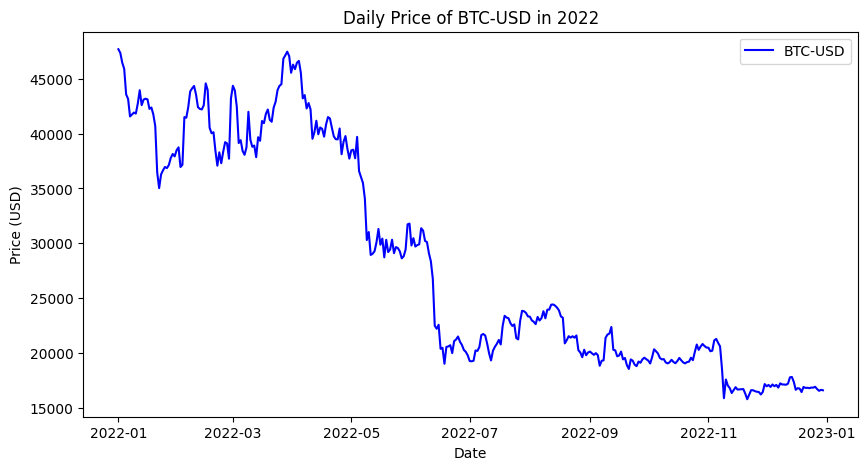

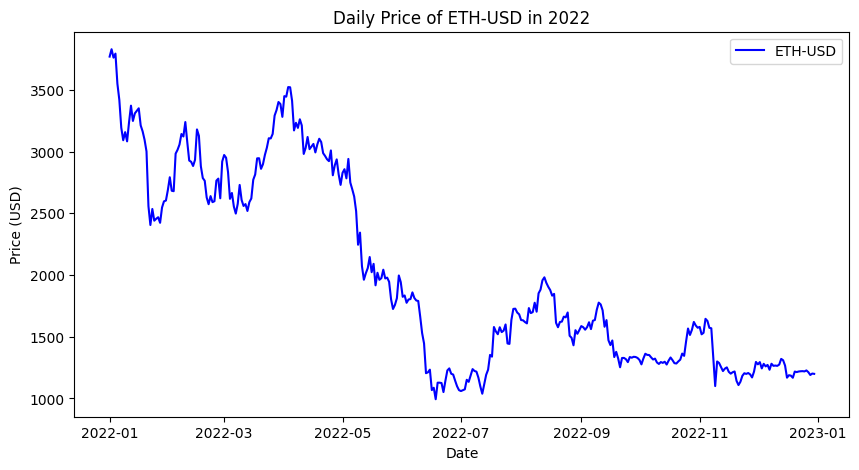

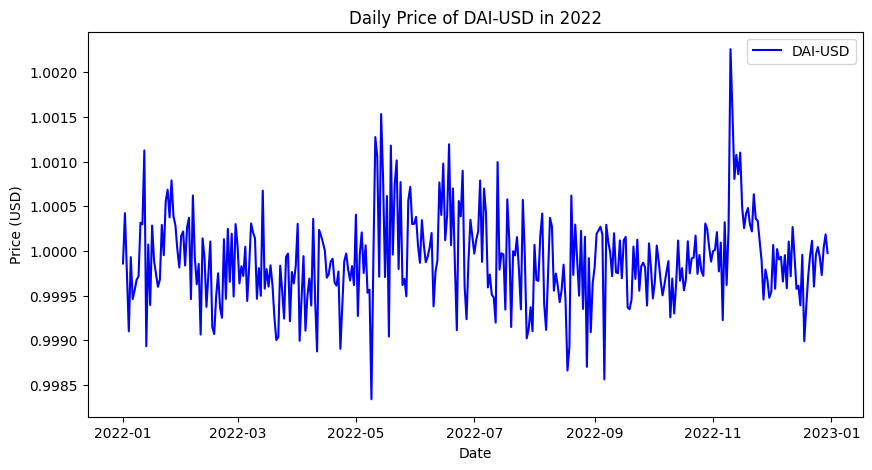

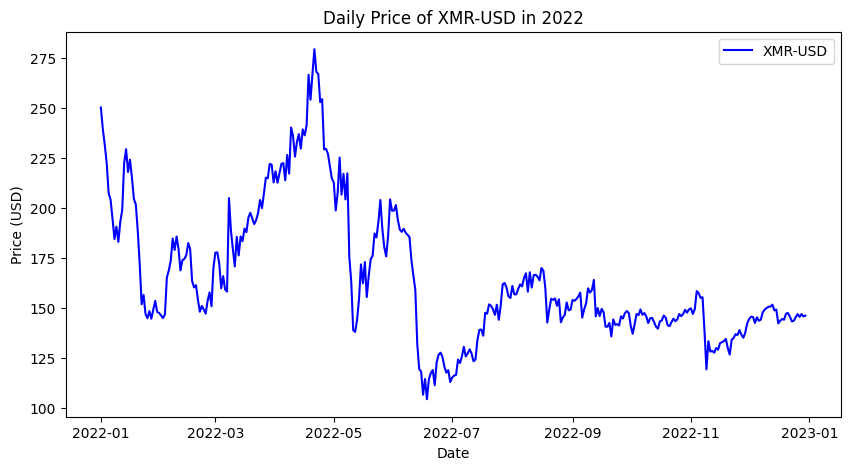

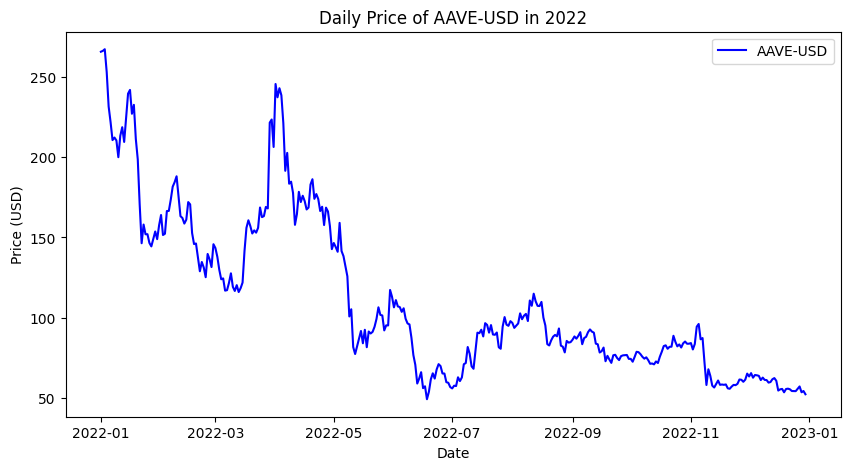

In [38]:
#2 Individual Daily Price Graphs for Each Cryptocurrency
for crypto in cryptos:
    plt.figure(figsize=(10, 5))
    plt.plot(data[crypto], label=crypto, color="b")
    plt.title(f'Daily Price of {crypto} in 2022')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()

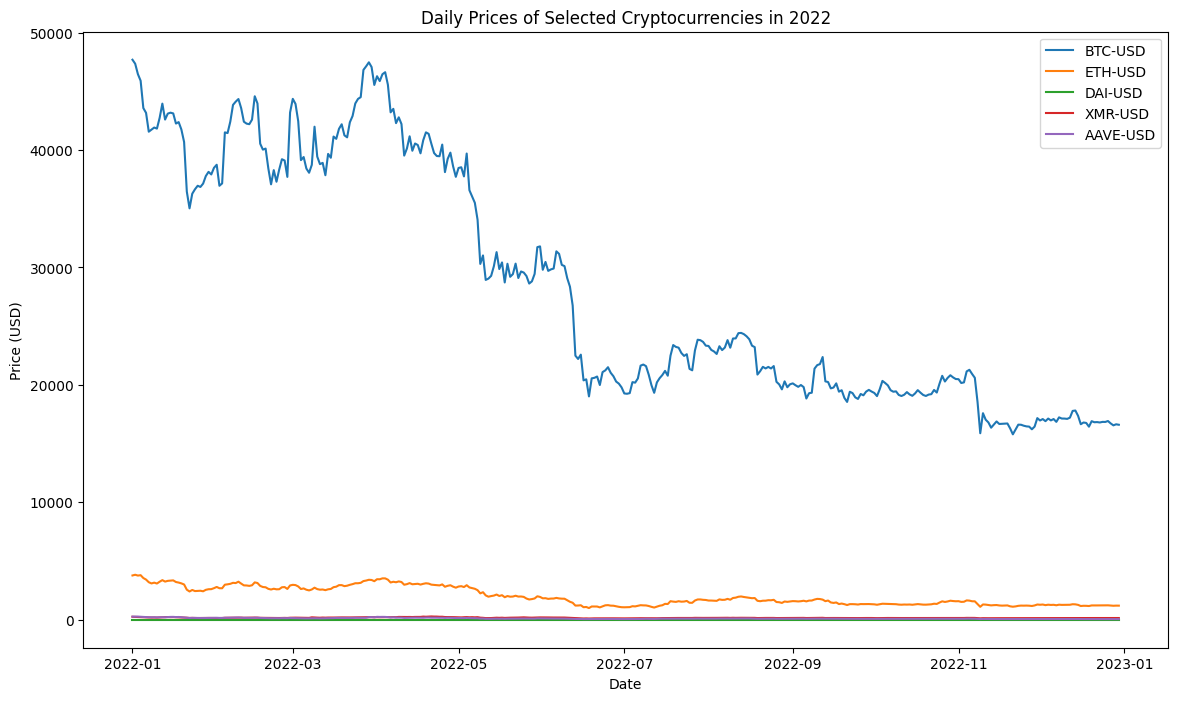

In [39]:
#Visualize Daily Prices
plt.figure(figsize=(14, 8))
for crypto in cryptos:
    plt.plot(data[crypto], label=crypto)
plt.legend()
plt.title('Daily Prices of Selected Cryptocurrencies in 2022')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

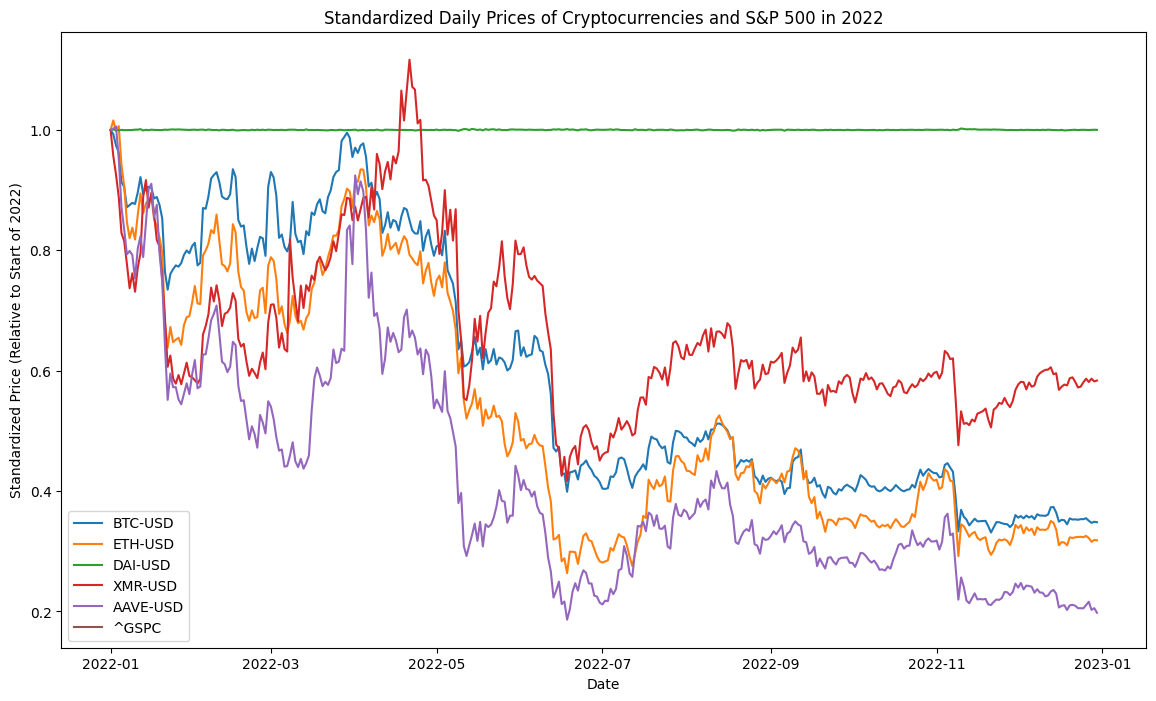

In [40]:
# Standardizing the data relative to the first date
standardized_data = data / data.iloc[0]  # Normalize by dividing by the first row

plt.figure(figsize=(14, 8))
for asset in cryptos + [sp500]:
    plt.plot(standardized_data[asset], label=asset)
plt.legend()
plt.title('Standardized Daily Prices of Cryptocurrencies and S&P 500 in 2022')
plt.xlabel('Date')
plt.ylabel('Standardized Price (Relative to Start of 2022)')
plt.show()

Standard Deviations of Daily Log Returns:
 Ticker
BTC-USD     0.033663
ETH-USD     0.045713
DAI-USD     0.000617
XMR-USD     0.047246
AAVE-USD    0.063513
dtype: float64
Highest Volatility: AAVE-USD (0.0635)
Lowest Volatility: DAI-USD (0.0006)


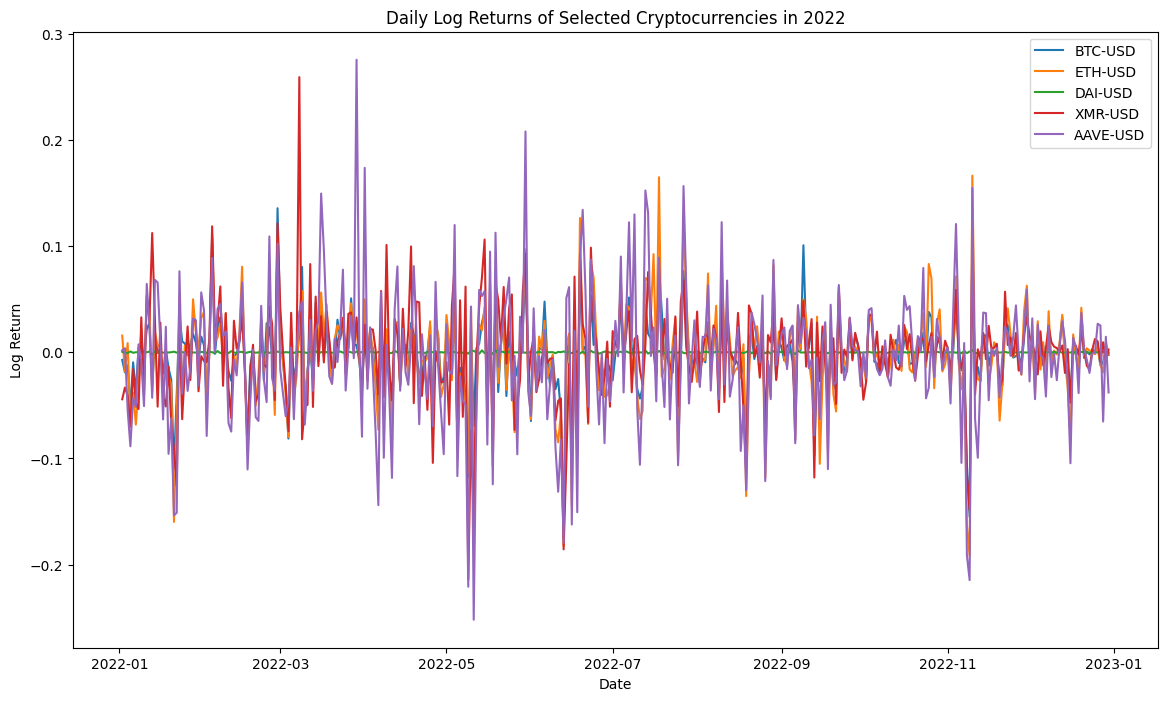

In [41]:
# 3. Daily Log Returns and Standard Deviation
log_returns = np.log(data[cryptos] / data[cryptos].shift(1)).dropna()  # Calculate daily log returns

# Calculate and print standard deviation of log returns
std_dev_log = log_returns.std()
print("Standard Deviations of Daily Log Returns:\n", std_dev_log)

# Identifying the highest and lowest volatility
highest_volatility = std_dev_log.idxmax()
lowest_volatility = std_dev_log.idxmin()

print(f"Highest Volatility: {highest_volatility} ({std_dev_log[highest_volatility]:.4f})")
print(f"Lowest Volatility: {lowest_volatility} ({std_dev_log[lowest_volatility]:.4f})")

# Plotting Daily Log Returns for Each Cryptocurrency
plt.figure(figsize=(14, 8))
for crypto in cryptos:
    plt.plot(log_returns[crypto], label=crypto)
plt.legend()
plt.title('Daily Log Returns of Selected Cryptocurrencies in 2022')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.show()



Correlation Matrix:
 Ticker     BTC-USD   ETH-USD   DAI-USD   XMR-USD  AAVE-USD
Ticker                                                    
BTC-USD   1.000000  0.899437  0.226203  0.711921  0.780396
ETH-USD   0.899437  1.000000  0.220118  0.700842  0.821226
DAI-USD   0.226203  0.220118  1.000000  0.191756  0.240567
XMR-USD   0.711921  0.700842  0.191756  1.000000  0.661512
AAVE-USD  0.780396  0.821226  0.240567  0.661512  1.000000


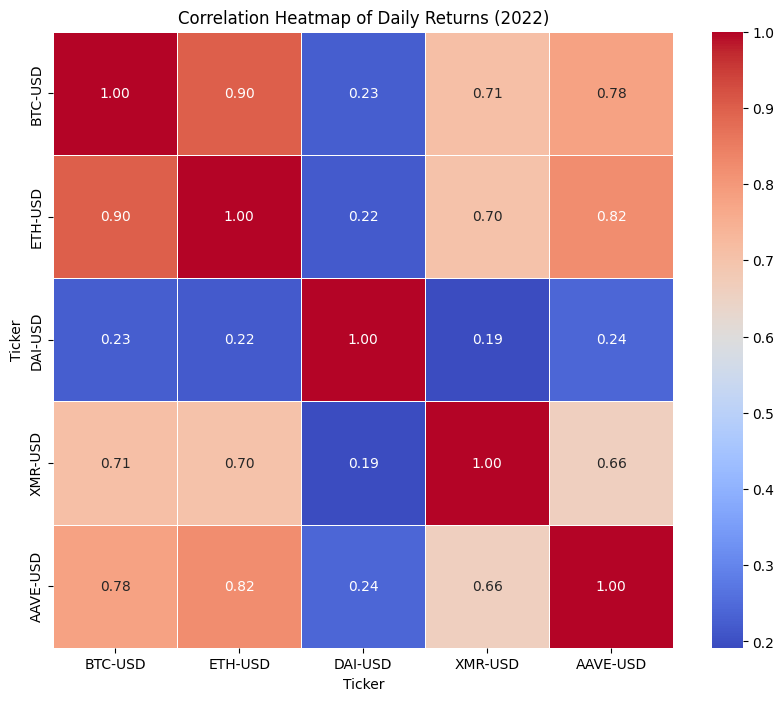

In [42]:
# 4. Correlation Matrix
correlation_matrix = log_returns.corr()
print("Correlation Matrix:\n", correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap of Daily Returns (2022)')
plt.show()

FTX Failure Impact on 2022-11-11:
Ticker
BTC-USD    -3.141444
ETH-USD    -0.942198
DAI-USD    -0.070330
XMR-USD    -3.906828
AAVE-USD   -6.076534
dtype: float64

Total Percentage Change in November 2022:
Ticker
BTC-USD    -16.190690
ETH-USD    -17.979057
DAI-USD     -0.052202
XMR-USD     -5.042982
AAVE-USD   -22.515813
dtype: float64


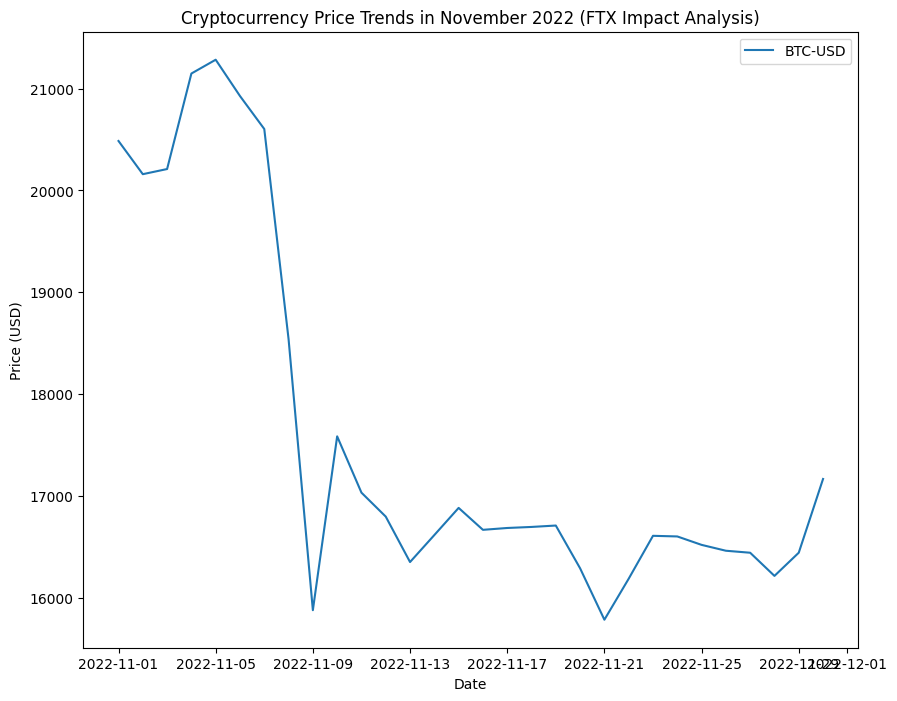

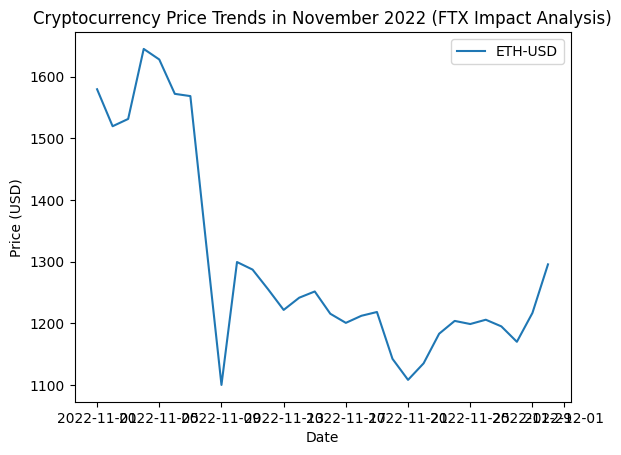

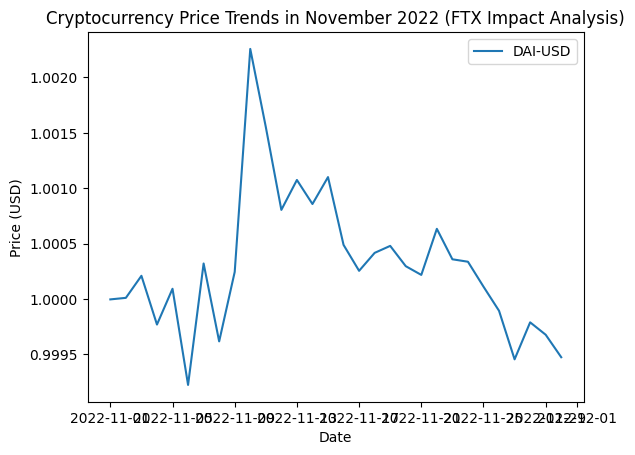

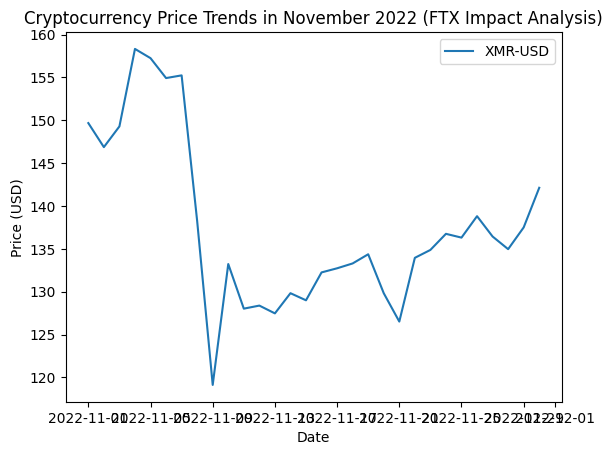

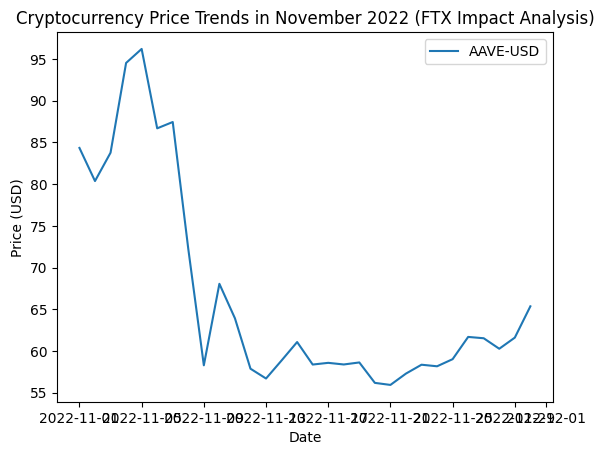

In [43]:
#7.Set up the specific date for FTX's failure
ftx_failure_date = '2022-11-11'
november_2022 = ('2022-11-01', '2022-11-30')

# Extract cryptocurrency prices on the FTX failure date and for the month of November
ftx_date_prices = data.loc[ftx_failure_date, cryptos]
november_prices = data.loc[november_2022[0]:november_2022[1], cryptos]

# Calculate the daily returns for the month of November
november_returns = november_prices.pct_change().dropna()

# Calculate the percentage change on the specific failure date (November 11)
# Directly referencing the prices from November 10 to avoid shift-related misalignment
ftx_impact = ((data.loc[ftx_failure_date, cryptos] - data.loc['2022-11-10', cryptos])
              / data.loc['2022-11-10', cryptos]) * 100
print(f"FTX Failure Impact on {ftx_failure_date}:")
print(ftx_impact)

# Calculate the total percentage change for each cryptocurrency throughout November 2022
november_total_change = ((november_prices.iloc[-1] - november_prices.iloc[0])
                         / november_prices.iloc[0]) * 100
print("\nTotal Percentage Change in November 2022:")
print(november_total_change)

# Visualizing the FTX impact for each cryptocurrency over November 2022
plt.figure(figsize=(10, 8))
for crypto in cryptos:
    plt.plot(november_prices.index, november_prices[crypto], label=crypto)
    plt.title("Cryptocurrency Price Trends in November 2022 (FTX Impact Analysis)")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.show()

[*********************100%***********************]  1 of 1 completed


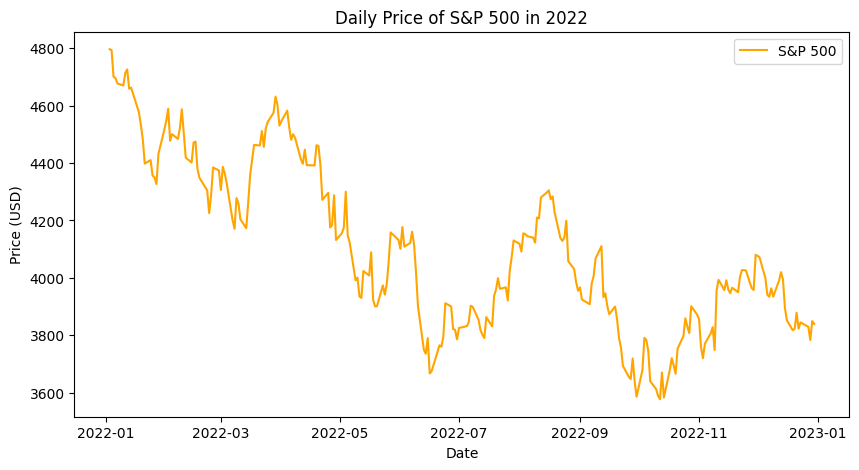

In [44]:
# 7a. Download S&P 500 data
sp500 = '^GSPC'  # Ticker for S&P 500
sp500_data = yf.download(sp500, start=start_date, end=end_date)['Adj Close']

# 7b. Visualize S&P 500 daily prices
plt.figure(figsize=(10, 5))
plt.plot(sp500_data, label='S&P 500', color='orange')
plt.title('Daily Price of S&P 500 in 2022')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


In [45]:

# 7c. Compute daily log returns and standard deviation for S&P 500
sp500_log_returns = np.log(sp500_data / sp500_data.shift(1)).dropna()
sp500_std_dev = sp500_log_returns.std()

print(f"\nS&P 500 Standard Deviation of Daily Log Returns: {sp500_std_dev}")

# 7d. Recompute the correlation matrix including S&P 500
# Combine cryptocurrency log returns and S&P 500 log returns
combined_log_returns = log_returns.copy()
combined_log_returns['S&P 500'] = sp500_log_returns



S&P 500 Standard Deviation of Daily Log Returns: Ticker
^GSPC    0.015263
dtype: float64


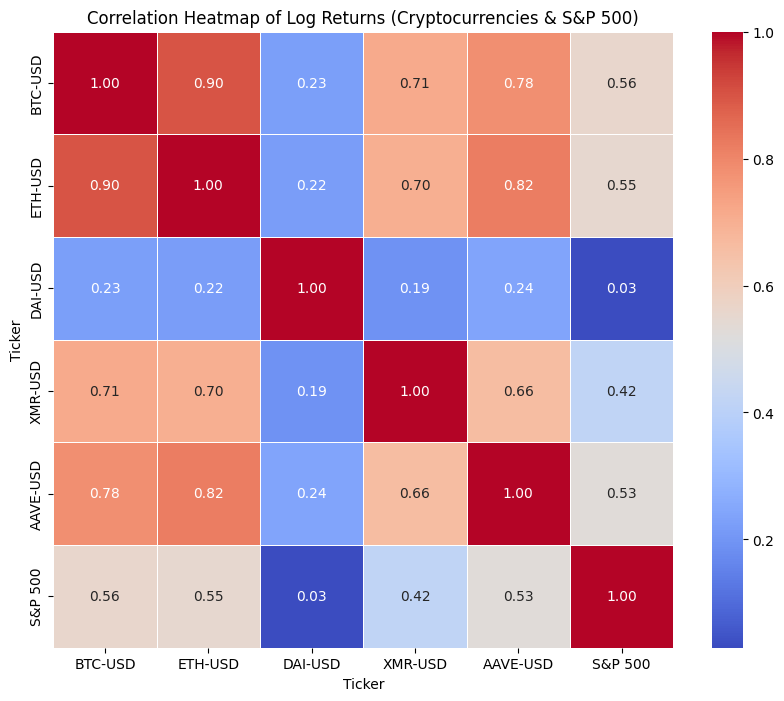

In [46]:

# Correlation matrix
combined_correlation_matrix = combined_log_returns.corr()

# Visualize the updated correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(combined_correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap of Log Returns (Cryptocurrencies & S&P 500)')
plt.show()



FTX Impact on S&P 500 (Log Return) on November 11, 2022: Ticker
^GSPC    0.919831
dtype: float64%

Total Log Return of S&P 500 in November 2022: Ticker
^GSPC    5.646764
dtype: float64%


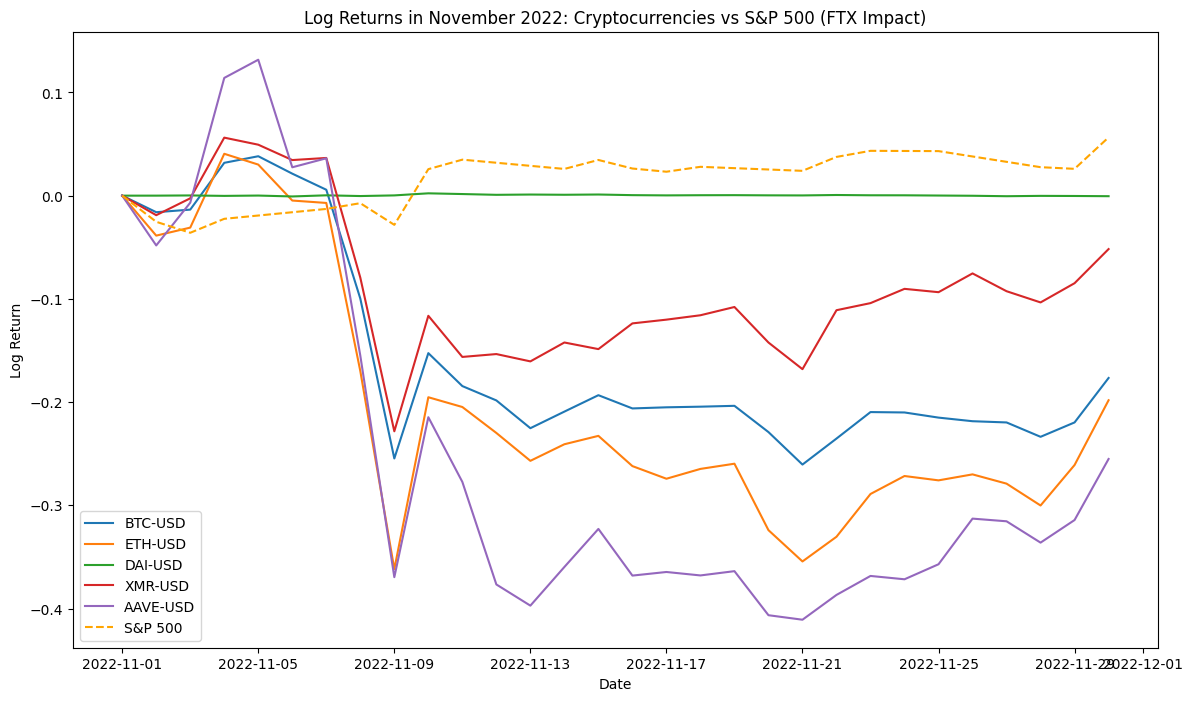

In [47]:

# 7e. Compare cryptocurrencies to S&P 500 in response to FTX failure
# Calculate log returns for November 11, 2022, for S&P 500
sp500_ftx_log_return = np.log(sp500_data.loc[ftx_failure_date] / sp500_data.loc['2022-11-10']) * 100

print(f"\nFTX Impact on S&P 500 (Log Return) on November 11, 2022: {sp500_ftx_log_return}%")

# Calculate total log returns in November for S&P 500
sp500_november_prices = sp500_data.loc['2022-11-01':'2022-11-30']
sp500_november_log_return = np.log(sp500_november_prices.iloc[-1] / sp500_november_prices.iloc[0]) * 100

print(f"\nTotal Log Return of S&P 500 in November 2022: {sp500_november_log_return}%")

# Visualize S&P 500 vs cryptocurrencies in November
plt.figure(figsize=(14, 8))
for crypto in cryptos:
    plt.plot(november_prices.index, np.log(november_prices[crypto] / november_prices[crypto].iloc[0]), label=crypto)
plt.plot(sp500_november_prices.index, np.log(sp500_november_prices / sp500_november_prices.iloc[0]),
         label='S&P 500', color='orange', linestyle='--')
plt.title("Log Returns in November 2022: Cryptocurrencies vs S&P 500 (FTX Impact)")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.legend()
plt.show()


In [48]:

# 7f. Summary comparison of volatility
print("\nComparing Standard Deviations of Log Returns (Volatility):")
print(f"S&P 500: {sp500_std_dev}")
print("Cryptocurrencies:")
print(log_returns.std())




Comparing Standard Deviations of Log Returns (Volatility):
S&P 500: Ticker
^GSPC    0.015263
dtype: float64
Cryptocurrencies:
Ticker
BTC-USD     0.033663
ETH-USD     0.045713
DAI-USD     0.000617
XMR-USD     0.047246
AAVE-USD    0.063513
dtype: float64
